In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Iris.csv')

# I. Khám phá bộ dữ liệu

## I.1) Mô tả bộ dữ liệu

Bộ dữ liệu bao gồm **3 loài hoa diên vĩ** (Iris-setosa, Iris-versicolor, Iris-virginica) với **50 mẫu mỗi loài** và **4 đặc tính** về mỗi loài hoa:
- SepalLengthCm: Chiều dài của đài hoa (tính bằng cm)
- SepalWidthCm: Chiều rộng của đài hoa (tính bằng cm)
- PetalLengthCm: Chiều dài của cánh hoa (tính bằng cm)
- PetalWidthCm: Chiều rộng của cánh hoa (tính bằng cm)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Lấy nhãn ra khỏi bộ dữ liệu và loại bỏ đặc trưng 'Id'

In [ ]:
label = df['Species'].to_numpy()
del df['Species']

del df['Id']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Nhận xét:**
1. Bộ dữ liệu không bị thiếu khuyết.
2. Tập giá trị của các cột trong bộ dữ liệu là số thực. 
3. Các đơn vị đo lường của từng cột là giống nhau, đều là “Cm”. 

## I.2) Mô hình hóa bộ dữ liệu

### 1. Miền giá trị & Ouliers

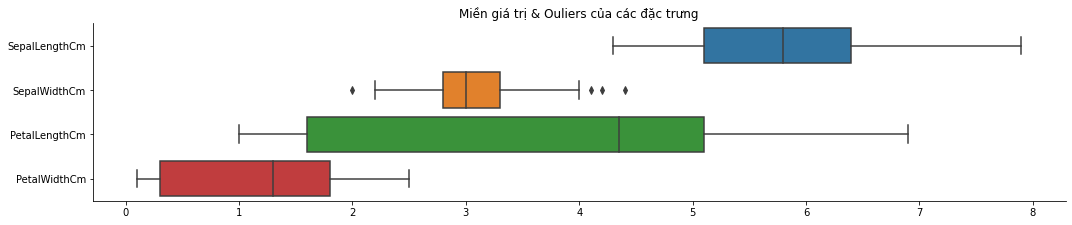

In [ ]:
graph_catplot = sns.catplot(data=df, orient="h", kind="box", height=3, aspect=15/3)
graph_catplot.set(title = "Miền giá trị & Ouliers của các đặc trưng")

plt.show()

In [ ]:
print("Miền giá trị của: ")
for f in df.columns:
  print("\t" + f + ": [" + str(df[f].min()) + ", " + str(df[f].max()) + "]")

Miền giá trị của: 
	SepalLengthCm: [4.3, 7.9]
	SepalWidthCm: [2.0, 4.4]
	PetalLengthCm: [1.0, 6.9]
	PetalWidthCm: [0.1, 2.5]


### 2. Ma trận tương quan tuyến tính (Correlation Matrix)

In [ ]:
corr = df.corr("pearson")
corr.style.background_gradient(cmap='coolwarm')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### 3. Biểu diễn từng điểm dữ liệu theo từng cặp đặc trưng

In [ ]:
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='Sepal Length',
                                 values=df.SepalLengthCm),
                            dict(label='Sepal Width',
                                 values=df.SepalWidthCm),
                            dict(label='Petal Length',
                                 values=df.PetalLengthCm),
                            dict(label='Petal Width',
                                 values=df.PetalWidthCm)],
                showupperhalf=False,
))

fig.update_layout(
    title='Scatter Matrix',
    width=800,
    height=800)

iplot(fig)

# II. Tiền xử lý dữ liệu

## II.1) Xử lý outliers

Từ biểu đồ *Miền giá trị & Ouliers của các đặc trưng*, ta có thể thấy đặc trưng *SepalWidthCm* chứa 4 outliers.

Ta sẽ xử lý 4 outliers bằng phương pháp **clipping**: Đưa outliers về giá trị lớn nhất hoặc nhỏ nhất của những điểm bình thường.

In [ ]:
median = np.median(df['SepalWidthCm'])
upper_quartile = np.percentile(df['SepalWidthCm'], 75)
lower_quartile = np.percentile(df['SepalWidthCm'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = df['SepalWidthCm'][df['SepalWidthCm']<=upper_quartile+1.5*iqr].max()
lower_whisker = df['SepalWidthCm'][df['SepalWidthCm']>=lower_quartile-1.5*iqr].min()

In [ ]:
for val in df['SepalWidthCm']:
  if val > upper_whisker: df['SepalWidthCm'] = df['SepalWidthCm'].replace(val, upper_whisker)
  elif val < lower_whisker: df['SepalWidthCm'] = df['SepalWidthCm'].replace(val, lower_whisker)

## II.2) Chuẩn hóa dữ liệu
Sử dụng phương pháp min-max normalization nhằm đưa các giá trị của các đặc trưng về một miền giá trị nhất định (ở đây là [0, 1])


In [ ]:
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

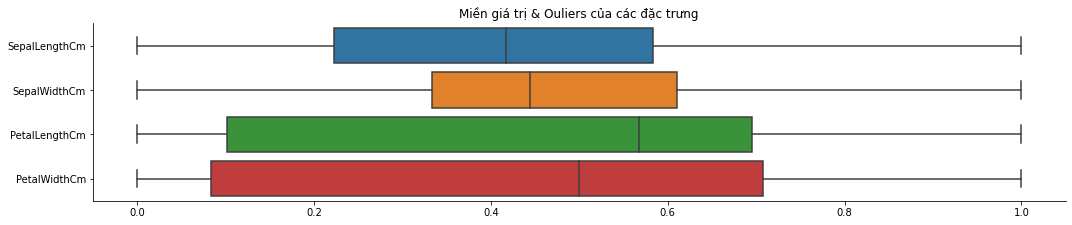

In [ ]:
graph_catplot = sns.catplot(data=df, orient="h", kind="box", height=3, aspect=15/3)
graph_catplot.set(title = "Miền giá trị & Ouliers của các đặc trưng")

plt.show()

# Export data

In [ ]:
df.insert(4, "Label", label, allow_duplicates=True)

In [ ]:
df.to_csv(r'Iris_new.csv', index = False)